In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
df = pd.read_csv('./Dataset/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [37]:
print(df.info())
print(df.describe)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None
<bound method NDFrame.describe of      Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   

In [38]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [39]:
print(df.shape)
print(df.duplicated().sum())

(918, 12)
0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [41]:
print(df['Sex'].value_counts())
print(df['ChestPainType'].value_counts())
print(df['RestingECG'].value_counts())
print(df['ExerciseAngina'].value_counts())
print(df['ST_Slope'].value_counts())

Sex
M    725
F    193
Name: count, dtype: int64
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64
ExerciseAngina
N    547
Y    371
Name: count, dtype: int64
ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64


In [42]:
### Category and sex are two categorical objects needed to convert numerical data.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex']= le.fit_transform(df['Sex'])
df['ChestPainType']= le.fit_transform(df['ChestPainType'])
df['RestingECG']= le.fit_transform(df['RestingECG'])
df['ExerciseAngina']= le.fit_transform(df['ExerciseAngina'])
df['ST_Slope']= le.fit_transform(df['ST_Slope'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int32  
 2   ChestPainType   918 non-null    int32  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int32  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int32  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int32  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int32(5), int64(6)
memory usage: 68.3 KB


In [43]:
corr_metrix = df.corr()
corr_metrix['HeartDisease']*100### 'RestingBP', 'RestingECG'

Age                28.203851
Sex                30.544492
ChestPainType     -38.682769
RestingBP          10.758898
Cholesterol       -23.274064
FastingBS          26.729119
RestingECG          5.738436
MaxHR             -40.042077
ExerciseAngina     49.428199
Oldpeak            40.395072
ST_Slope          -55.877071
HeartDisease      100.000000
Name: HeartDisease, dtype: float64

<Axes: >

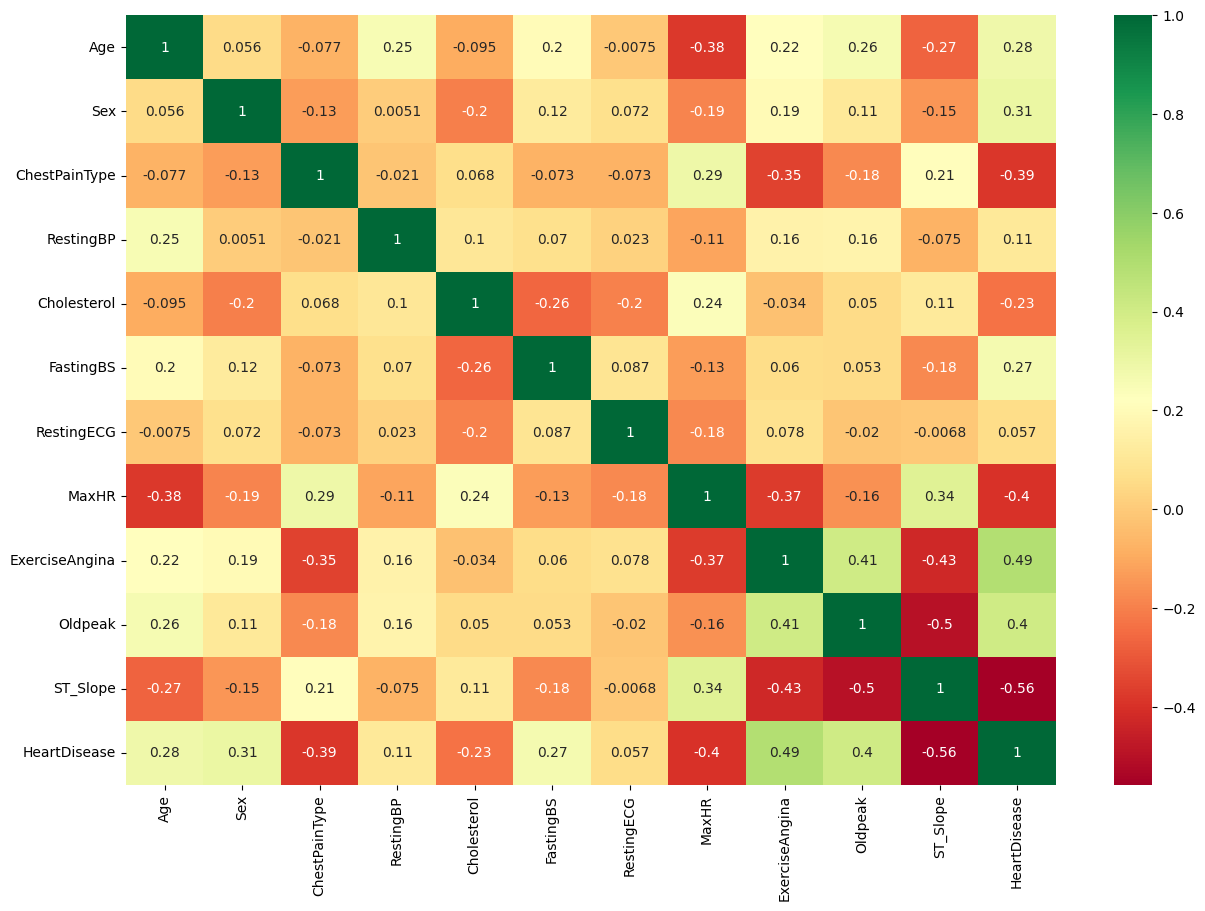

In [44]:
plt.figure(figsize=(15,10))
sns.heatmap(corr_metrix, annot=True, cmap='RdYlGn')

In [45]:
X = df.drop(['HeartDisease','RestingBP', 'RestingECG'], axis=1)
y = df['HeartDisease']
print(X.shape, y.shape)

(918, 9) (918,)


In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)


In [47]:
# improt ALl models.
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
# from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB

# import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error

#importing pipeline
from sklearn.pipeline import Pipeline

In [48]:
# create a list of models to evaluate
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('KNeighbors Classifier', KNeighborsClassifier()),
    ('Decision Tree Classifier', DecisionTreeClassifier()),
    ('AdaBoost Classifier', AdaBoostClassifier()),
    ('Random Forest', RandomForestClassifier()),
    # ('XGboost Classifier', XGBClassifier(random_state=42)),   
    ('Support Vector Machine', SVC()),    
    ('Naye base Classifier', GaussianNB())    
    
]

best_model = None
best_accuracy = 0.0



In [49]:
from sklearn.model_selection import cross_val_score
#Iterate over the models and evaluate their performance
for name, model in models:
    #create a pipeline for each model
    pipeline = Pipeline([
        # ('imputer', SimpleImputer(strategy='most_frequent)),
        #('encoder', OneHotEncoder(handle_unknow='ignore'))
        ('model', model)
    ])
    
    # perform cross validation
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)
    
    # Calculate mean accuracy
    mean_accuracy = scores.mean()
    
    #fit the pipeline on the training data
    pipeline.fit(X_train, y_train)
    
    # make prediction on the test data
    y_pred = pipeline.predict(X_test)
    
    #Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)*100
    
    #print the performance metrics
    print("Model", name)
    print("Cross Validation accuracy: ", mean_accuracy*100)
    print("Test Accuracy: ", accuracy)
    print()
    
    #Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline
    
# Retrieve the best model
print("Best Model: ", best_model)

C:\Users\babun\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\babun\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

Model Logistic Regression
Cross Validation accuracy:  84.60721274811294
Test Accuracy:  89.67391304347827

Model Gradient Boosting
Cross Validation accuracy:  86.64523343584008
Test Accuracy:  90.21739130434783

Model KNeighbors Classifier
Cross Validation accuracy:  71.25617370235766
Test Accuracy:  67.3913043478261

Model Decision Tree Classifier
Cross Validation accuracy:  78.47730873171186
Test Accuracy:  83.15217391304348

Model AdaBoost Classifier
Cross Validation accuracy:  84.74233529028051
Test Accuracy:  90.21739130434783

Model Random Forest
Cross Validation accuracy:  85.83263442363247
Test Accuracy:  90.21739130434783

Model Support Vector Machine
Cross Validation accuracy:  70.70729661727707
Test Accuracy:  77.71739130434783

Model Naye base Classifier
Cross Validation accuracy:  84.19811760320567
Test Accuracy:  88.58695652173914

Best Model:  Pipeline(steps=[('model', GradientBoostingClassifier())])
